In [184]:
# Basic Libraries
import pandas as pd 
import numpy as np


import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy import stats

import networkx as nx
%matplotlib inline

from pandas import DataFrame
import seaborn as sns

sb.set() 

In [185]:
productDim = pd.read_csv('s1_product_dimensions.csv')
transactionDataS1 = pd.read_csv('s1_transaction_data.csv')
productMaster = pd.read_csv('s2_product_master.csv')
transactionDataS2 = pd.read_csv('s2_transaction_data.csv')

getPE = {"CiggBM": 9811026, "CiggA": 9096004, "CiggAM": 9424999, "CiggB": 9110167}




In [186]:
transactionDataS1.head()

,product_ean,sales_pieces,sales_turnover_gross,store_id,sales_date_id,sales_receipt
0,9096004,3.0,65700.0,64,20191201,110342232
1,9096004,2.0,43800.0,64,20191205,111790500
2,9096004,1.0,21900.0,64,20191205,111839706
3,9096004,3.0,65700.0,64,20191204,111004662
4,9096004,1.0,21900.0,64,20191204,110997769


In [187]:
productDim.head()

,product_name,is_multipack,product_ean
0,Cigg B,1,9811026
1,Cigg A,0,9096004
2,Cigg A,1,9424999
3,Cigg B,0,9110167


In [188]:
CiggBM = transactionDataS1[transactionDataS1["product_ean"] == 9811026]
CiggA = transactionDataS1[transactionDataS1["product_ean"] == 9096004]
CiggAM = transactionDataS1[transactionDataS1["product_ean"] == 9424999]
CiggB = transactionDataS1[transactionDataS1["product_ean"] == 9110167]

In [189]:
# STORE LIST 
mylist = list(transactionDataS1["store_id"])
store_list = list(dict.fromkeys(mylist))

# STORE CiggBM 
mylist = list( CiggBM[["store_id"]] ["store_id"])
CiggBM_store_list = list(dict.fromkeys(mylist))

# STORE CiggA 
mylist = list( CiggA[["store_id"]] ["store_id"])
CiggA_store_list = list(dict.fromkeys(mylist))

# STORE CiggAM 
mylist = list( CiggAM[["store_id"]] ["store_id"])
CiggAM_store_list = list(dict.fromkeys(mylist))

# STORE CiggB 
mylist = list( CiggB[["store_id"]] ["store_id"])
CiggB_store_list = list(dict.fromkeys(mylist))

# CiggAM_store_list

# Section 1 
# Quantity Estimation



# 1. Investigate data quality problems within the transactional-dataset and propose generalizable, scalable methods to manage identified issues




### Anomaly Detection

#### There are errors/wrong input values in the transactional-dataset 1

#### These errors are detected using Anomaly Detection Algorithms, and then removed from the DataSet


#### Illustrating an example of error in Data Set

#### The "turnover per unit" gives an estimate of the sales turnover for a single unit

#### We can notice that all the "turn over per unit" aprox 21900 for all data
#### except for index number 3

#### Index number 3, is an error. Therefore has to be removed from the data set

In [190]:
CiggA_9811026_81 = CiggA[CiggA["store_id"] == 81]
CiggA_9811026_81 = CiggA_9811026_81.reset_index(level=0, drop=True)

CiggA_9811026_81 = CiggA_9811026_81.reset_index(level=0, drop=True)
CiggA_9811026_81['turnover per unit'] = CiggA_9811026_81['sales_turnover_gross']/CiggA_9811026_81['sales_pieces']
CiggA_9811026_81_turn = CiggA_9811026_81

CiggA_9811026_81_turn_sort = CiggA_9811026_81_turn.sort_values('sales_pieces')
CiggA_9811026_81_turn_sort = CiggA_9811026_81_turn_sort.reset_index(level=0, drop=True)
CiggA_9811026_81_turn_sort


,product_ean,sales_pieces,sales_turnover_gross,store_id,sales_date_id,sales_receipt,turnover per unit
0,9096004,1.0,21900.0,81,20191209,114658350,21900.0
1,9096004,1.0,21900.0,81,20191212,115629906,21900.0
2,9096004,1.0,21900.0,81,20191212,115494232,21900.0
3,9096004,1.0,217000.0,81,20191211,115142586,217000.0
4,9096004,1.0,21900.0,81,20191210,114980549,21900.0
5,9096004,1.0,21900.0,81,20191209,114637516,21900.0
6,9096004,1.0,21900.0,81,20191204,111020426,21900.0
7,9096004,1.0,21900.0,81,20191202,110529828,21900.0
8,9096004,1.0,21900.0,81,20191201,109994263,21900.0
9,9096004,1.0,21900.0,81,20191206,112813908,21900.0


### We calculate the z-value for all the data

In [191]:
from scipy import stats
import numpy as np
# CiggA_9811026_81_turn_sort[['turnover per unit']] = CiggA_9811026_81_turn_sort[['turnover per unit']]

z = np.abs(stats.zscore(CiggA_9811026_81_turn_sort[['turnover per unit']]))

print( "Z Value for the above DataSet")
print()
print(z)
threshold = 3
outLierList = np.where(z > 3)[0]

print()
print("outlier index == ", outLierList[0])
print()
print("Z-Value == ", z[outLierList[0]])


Z Value for the above DataSet

[[0.19936012]
 [0.19936012]
 [0.19936012]
 [4.99999279]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.20469006]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.19936012]
 [0.20469006]
 [0.20469006]]

outlier index ==  3

Z-Value ==  [4.99999279]


### Index number 3 ([4.99999279]) is an Anomaly/Error
### It is removed from the data

### Similarly 

### Using the Same method to identify and remove all errors
### And printing the quality Data Set

In [192]:
#######################################################################################################################
# CiggBM
df_empty = CiggBM[0:0]
df_empty
df_empty['turnover per unit'] = df_empty['sales_turnover_gross']/df_empty['sales_pieces']
df_empty



for shop in CiggBM_store_list:
    CiggBM_17927 = CiggBM[CiggBM["store_id"] == shop]
    CiggBM_17927 = CiggBM_17927.reset_index(level=0, drop=True)

    CiggBM_17927['turnover per unit'] = CiggBM_17927['sales_turnover_gross']/CiggBM_17927['sales_pieces']


    CiggBM_17927_turn_sort = CiggBM_17927.sort_values('sales_pieces')
    CiggBM_17927_turn_sort = CiggBM_17927_turn_sort.reset_index(level=0, drop=True)
    CiggBM_17927_turn_sort
    
    z = np.abs(stats.zscore(CiggBM_17927_turn_sort[['turnover per unit']]))

    threshold = 3
    oulierList = np.where(z > threshold)[0]
    CiggA_9811026_81_turn_sort_noOutlier = CiggBM_17927_turn_sort.drop(oulierList)
    CiggA_9811026_81_turn_sort_noOutlier = CiggA_9811026_81_turn_sort_noOutlier.reset_index(level=0, drop=True)  
    df_empty = pd.concat([df_empty, CiggA_9811026_81_turn_sort_noOutlier], axis=0)

    
CiggBM_qualityDF = df_empty.reset_index(level=0, drop=True)
CiggBM_qualityDF


,product_ean,sales_pieces,sales_turnover_gross,store_id,sales_date_id,sales_receipt,turnover per unit
0,9811026,1.0,217000.0,287,20191215,116518912,217000.0
1,9811026,1.0,217000.0,287,20191204,111330738,217000.0
2,9811026,1.0,217000.0,287,20191203,110664890,217000.0
3,9811026,1.0,217000.0,287,20191204,111321995,217000.0
4,9811026,1.0,217000.0,287,20191206,112388760,217000.0
5,9811026,1.0,217000.0,287,20191204,111229518,217000.0
6,9811026,1.0,217000.0,287,20191202,110451485,217000.0
7,9811026,1.0,217000.0,287,20191203,110663983,217000.0
8,9811026,1.0,217000.0,287,20191211,115104835,217000.0
9,9811026,1.0,217000.0,287,20191214,116282488,217000.0


In [193]:
#######################################################################################################################
# CiggB 
df_empty = CiggB[0:0]
df_empty
df_empty['turnover per unit'] = df_empty['sales_turnover_gross']/df_empty['sales_pieces']
df_empty


for shop in CiggB_store_list:
    CiggBM_17927 = CiggB[CiggB["store_id"] == shop]
    CiggBM_17927 = CiggBM_17927.reset_index(level=0, drop=True)

    CiggBM_17927['turnover per unit'] = CiggBM_17927['sales_turnover_gross']/CiggBM_17927['sales_pieces']

    CiggBM_17927_turn_sort = CiggBM_17927.sort_values('sales_pieces')
    CiggBM_17927_turn_sort = CiggBM_17927_turn_sort.reset_index(level=0, drop=True)
    CiggBM_17927_turn_sort
    
    z = np.abs(stats.zscore(CiggBM_17927_turn_sort[['turnover per unit']]))
    threshold = 3
    oulierList = np.where(z > threshold)[0]
    CiggA_9811026_81_turn_sort_noOutlier = CiggBM_17927_turn_sort.drop(oulierList)
    CiggA_9811026_81_turn_sort_noOutlier = CiggA_9811026_81_turn_sort_noOutlier.reset_index(level=0, drop=True)    
    df_empty = pd.concat([df_empty, CiggA_9811026_81_turn_sort_noOutlier], axis=0)



CiggB_qualityDF = df_empty.reset_index(level=0, drop=True)
CiggB_qualityDF


,product_ean,sales_pieces,sales_turnover_gross,store_id,sales_date_id,sales_receipt,turnover per unit
0,9110167,1.0,22000.0,64,20191201,110381559,22000.0
1,9110167,1.0,22000.0,64,20191215,116491195,22000.0
2,9110167,1.0,22000.0,64,20191215,116514277,22000.0
3,9110167,1.0,22000.0,64,20191215,116378725,22000.0
4,9110167,1.0,22000.0,64,20191213,115751600,22000.0
5,9110167,1.0,22000.0,64,20191210,114924181,22000.0
6,9110167,1.0,22000.0,64,20191211,115088653,22000.0
7,9110167,1.0,22000.0,64,20191210,114873464,22000.0
8,9110167,1.0,22000.0,64,20191214,116136509,22000.0
9,9110167,1.0,22000.0,64,20191208,113614406,22000.0


In [194]:
#######################################################################################################################
# CiggAM

df_empty = CiggAM[0:0]
df_empty['turnover per unit'] = df_empty['sales_turnover_gross']/df_empty['sales_pieces']
df_empty



for shop in CiggAM_store_list:
    CiggBM_17927 = CiggAM[CiggAM["store_id"] == shop]
    CiggBM_17927 = CiggBM_17927.reset_index(level=0, drop=True)

    CiggBM_17927['turnover per unit'] = CiggBM_17927['sales_turnover_gross']/CiggBM_17927['sales_pieces']


    CiggBM_17927_turn_sort = CiggBM_17927.sort_values('sales_pieces')
    CiggBM_17927_turn_sort = CiggBM_17927_turn_sort.reset_index(level=0, drop=True)
    CiggBM_17927_turn_sort
    
    z = np.abs(stats.zscore(CiggBM_17927_turn_sort[['turnover per unit']]))

    threshold = 3
    oulierList = np.where(z > threshold)[0]
    CiggA_9811026_81_turn_sort_noOutlier = CiggBM_17927_turn_sort.drop(oulierList)
    CiggA_9811026_81_turn_sort_noOutlier = CiggA_9811026_81_turn_sort_noOutlier.reset_index(level=0, drop=True)    

    df_empty = pd.concat([df_empty, CiggA_9811026_81_turn_sort_noOutlier], axis=0)


CiggAM_qualityDF = df_empty.reset_index(level=0, drop=True)
CiggAM_qualityDF


,product_ean,sales_pieces,sales_turnover_gross,store_id,sales_date_id,sales_receipt,turnover per unit
0,9424999,1.0,214500.0,287,20191215,116461471,214500.0
1,9424999,1.0,214500.0,287,20191207,113326174,214500.0
2,9424999,1.0,214500.0,287,20191207,113138951,214500.0
3,9424999,1.0,214500.0,287,20191204,111340543,214500.0
4,9424999,1.0,214500.0,287,20191203,110821456,214500.0
5,9424999,1.0,214500.0,287,20191204,111215827,214500.0
6,9424999,1.0,214500.0,287,20191209,114666567,214500.0
7,9424999,1.0,214500.0,287,20191208,113910668,214500.0
8,9424999,1.0,214500.0,287,20191208,113637095,214500.0
9,9424999,1.0,214500.0,287,20191208,113715365,214500.0


In [195]:
#######################################################################################################################
# CiggA
df_empty = CiggA[0:0]
df_empty['turnover per unit'] = df_empty['sales_turnover_gross']/df_empty['sales_pieces']
df_empty

np.seterr(divide='ignore', invalid='ignore')

for shop in CiggA_store_list:
    CiggBM_17927 = CiggA[CiggA["store_id"] == shop]
    CiggBM_17927 = CiggBM_17927.reset_index(level=0, drop=True)

    CiggBM_17927['turnover per unit'] = CiggBM_17927['sales_turnover_gross']/CiggBM_17927['sales_pieces']
    # CiggA_9811026_53_turn = CiggA_9811026_53

    CiggBM_17927_turn_sort = CiggBM_17927.sort_values('sales_pieces')
    CiggBM_17927_turn_sort = CiggBM_17927_turn_sort.reset_index(level=0, drop=True)
    CiggBM_17927_turn_sort
    
    z = np.abs(stats.zscore(CiggBM_17927_turn_sort[['turnover per unit']]))
    # print(z)
    threshold = 3
    oulierList = np.where(z > threshold)[0]
    CiggA_9811026_81_turn_sort_noOutlier = CiggBM_17927_turn_sort.drop(oulierList)
    CiggA_9811026_81_turn_sort_noOutlier = CiggA_9811026_81_turn_sort_noOutlier.reset_index(level=0, drop=True)

    df_empty = pd.concat([df_empty, CiggA_9811026_81_turn_sort_noOutlier], axis=0)


CiggA_qualityDF = df_empty.reset_index(level=0, drop=True)
CiggA_qualityDF


,product_ean,sales_pieces,sales_turnover_gross,store_id,sales_date_id,sales_receipt,turnover per unit
0,9096004,1.0,21900.0,64,20191214,116310402,21900.0
1,9096004,1.0,21900.0,64,20191214,116034650,21900.0
2,9096004,1.0,21900.0,64,20191214,116277728,21900.0
3,9096004,1.0,21900.0,64,20191212,115637624,21900.0
4,9096004,1.0,21900.0,64,20191212,115522969,21900.0
5,9096004,1.0,21900.0,64,20191211,115304536,21900.0
6,9096004,1.0,21900.0,64,20191207,113351123,21900.0
7,9096004,1.0,21900.0,64,20191212,115654729,21900.0
8,9096004,1.0,21900.0,64,20191212,115412542,21900.0
9,9096004,1.0,21900.0,64,20191212,115672360,21900.0


## The below Data Set is the complete transactionDataS1 after removing the errors

In [196]:
#######################################################################################################################

transactionDataS1_qualityDF = pd.concat([CiggBM_qualityDF, CiggA_qualityDF, CiggAM_qualityDF, CiggB_qualityDF], axis=0)


transactionDataS1_qualityDF = transactionDataS1_qualityDF.reset_index(level=0, drop=True)
transactionDataS1_qualityDF


,product_ean,sales_pieces,sales_turnover_gross,store_id,sales_date_id,sales_receipt,turnover per unit
0,9811026,1.0,217000.0,287,20191215,116518912,217000.0
1,9811026,1.0,217000.0,287,20191204,111330738,217000.0
2,9811026,1.0,217000.0,287,20191203,110664890,217000.0
3,9811026,1.0,217000.0,287,20191204,111321995,217000.0
4,9811026,1.0,217000.0,287,20191206,112388760,217000.0
5,9811026,1.0,217000.0,287,20191204,111229518,217000.0
6,9811026,1.0,217000.0,287,20191202,110451485,217000.0
7,9811026,1.0,217000.0,287,20191203,110663983,217000.0
8,9811026,1.0,217000.0,287,20191211,115104835,217000.0
9,9811026,1.0,217000.0,287,20191214,116282488,217000.0


In [197]:
print(f"Before removing errors")
print(f"transactionDataS1  = {len(transactionDataS1)}  ")
print()
print(f"After removing errors")
print(f"transactionDataS1_qualityDF = {len(transactionDataS1_qualityDF)}" )
print()
print(f"Number of errors removed")
print(f"difference  = {len(transactionDataS1) - len(transactionDataS1_qualityDF)}  ")


Before removing errors
transactionDataS1  = 56658  

After removing errors
transactionDataS1_qualityDF = 56094

Number of errors removed
difference  = 564  


2. Estimate the total number of units sold across the time period for each cigarette. Applications are examined based on the quality of considerations that was given to the estimation process

In [218]:
CiggBM_totalUnits = sum(list(CiggBM_qualityDF["sales_pieces"]))
CiggA_totalUnits = sum(list(CiggA_qualityDF["sales_pieces"]))
CiggAM_totalUnits = sum(list(CiggAM_qualityDF["sales_pieces"]))
CiggB_totalUnits = sum(list(CiggB_qualityDF["sales_pieces"]))
print("Total number of units of :")
print(f"CiggBM      : {int(CiggBM_totalUnits)}")
print(f"CiggA       : {int(CiggA_totalUnits)}")
print(f"CiggAM      : {int(CiggAM_totalUnits)}")
print(f"CiggB       : {int(CiggB_totalUnits)}")

Total number of units of :
CiggBM      : 8011
CiggA       : 56015
CiggAM      : 16491
CiggB       : 26783


# Section 2 
# Shopper Analytics - Customer Segmentation & Category Associations

# 1. Arrange customers into mutually exclusive groups and describe the customer clusters. Code-libraries are allowed for this section of the code.




In [199]:
transactionDataS2 = transactionDataS2[["sales_receipt", "sales_customer", "sales_product", "sales_date_id"]]
transactionDataS2.head()

,sales_receipt,sales_customer,sales_product,sales_date_id
0,203722145,569,30763,20180102
1,203722145,569,112415,20180102
2,203722145,569,49480,20180102
3,203722145,569,130287,20180102
4,203722145,569,68306,20180102


In [200]:
productMaster.head()

,Unnamed: 0,product_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,0,265,Alcohol,Beer
1,1,1255,Alcohol,Beer
2,2,2425,Alcohol,Beer
3,3,4343,Alcohol,Beer
4,4,4709,Alcohol,Beer


In [201]:
s2pm = pd.merge(transactionDataS2, productMaster, how='inner', left_on='sales_product', right_on='product_id')
s2pm.head()

,sales_receipt,sales_customer,sales_product,sales_date_id,Unnamed: 0,product_id,product_lvl1_cat_desc,product_lvl2_cat_desc
0,203722145,569,30763,20180102,5164,30763,FoodCommodity,JarredFood
1,203960181,358,30763,20180201,5164,30763,FoodCommodity,JarredFood
2,204115623,358,30763,20180222,5164,30763,FoodCommodity,JarredFood
3,204158417,569,30763,20180228,5164,30763,FoodCommodity,JarredFood
4,204168017,358,30763,20180301,5164,30763,FoodCommodity,JarredFood


In [202]:
mylist = list( transactionDataS2[["sales_customer"]] ["sales_customer"])
distinct_sales_customer = list(dict.fromkeys(mylist))

# Repeat Customers 

## DataFrame shows the number of times a the customer visited the shop

In [203]:

repeatCustDF  = s2pm[["sales_customer"]][0:0]
scList = []
countList = []
mylist = list( transactionDataS2[["sales_customer"]] ["sales_customer"])
distinct_sales_customer = list(dict.fromkeys(mylist))

for cus in distinct_sales_customer:
    tempDF = s2pm[s2pm["sales_customer"] == cus]
    tempAllRec = list( tempDF[["sales_receipt"]] ["sales_receipt"])
    distinct_sales_customer = list(dict.fromkeys(tempAllRec))
    tempLen = len(distinct_sales_customer)
    scList.append(cus)
    countList.append(tempLen)
    
repeatCustDF["sales_customer"]=scList
repeatCustDF["repeats"]= countList

repeatCustDF = repeatCustDF.sort_values('repeats')
repeatCustDF = repeatCustDF.reset_index(level=0, drop=True)
repeatCustDF
    


,sales_customer,repeats
0,211,1
1,125,1
2,545,1
3,124,1
4,560,1
5,322,1
6,106,1
7,144,1
8,1,1
9,292,1


In [204]:
countDic = {'1-10':0, '11-20':0, '21-30':0, '31-40':0, '41-50':0, '51-60':0,'61-70':0}
for cou in countList:
    if (cou <=10):
        countDic['1-10'] += 1
    elif (cou >=11 and cou <= 20):
        countDic['11-20'] += 1
    elif (cou >=21 and cou <= 30):
        countDic['21-30'] += 1
    elif (cou >=31 and cou <= 40):
        countDic['31-40'] += 1
    elif (cou >=41 and cou <= 50):
        countDic['41-50'] += 1     
    elif (cou >=51 and cou <= 60):
        countDic['51-60'] += 1 
    elif (cou >=61 ):
        countDic['61-70'] += 1  
list(countDic.values())        

[188, 58, 27, 18, 6, 5, 1]

# Y Axis indicates the number of customers
# X Axis indicates the Categoy of number of Visits

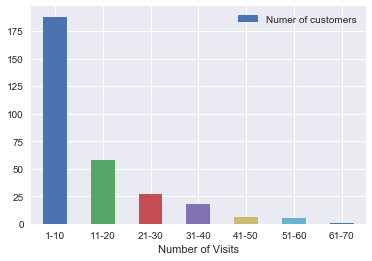

In [205]:
df = pd.DataFrame({'Number of Visits':[ i for i in list(countDic.keys())], 'Numer of customers':[i for i in list(countDic.values())]})
ax = df.plot.bar(x='Number of Visits', y='Numer of customers', rot=0)

# Graph

## Graph is formed based on product_lvl1_cat_desc category

## Node is category-level-1
## Edge concecting one Node other Node (category-level-1)
## Weighted Edge indicates the number of customer who have bought products from both categories

In [206]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [207]:
def EdgeCount(node, pair):
#     count = 0
    tempDF1 = s2pm[s2pm["product_lvl1_cat_desc"] == node]
    tempDF1 = list( tempDF1[["sales_customer"]] ["sales_customer"])
    distinct_tempDF1 = list(dict.fromkeys(tempDF1))
    tempDF2 = s2pm[s2pm["product_lvl1_cat_desc"] == pair]
    tempDF2 = list( tempDF2[["sales_customer"]] ["sales_customer"])
    distinct_tempDF2 = list(dict.fromkeys(tempDF2))    
    return len(intersection(distinct_tempDF1, distinct_tempDF2))

print("Number of customers who have bought Alcohol and FoodCommodity")
print(EdgeCount("Alcohol", "FoodCommodity"))

Number of customers who have bought Alcohol and FoodCommodity
114


In [208]:

nodedic = {}

temp = list( s2pm[["product_lvl1_cat_desc"]] ["product_lvl1_cat_desc"])
distinct_lvl1_list = list(dict.fromkeys(temp))
# distinct_lvl1_list2 = list(dict.fromkeys(temp))

for i in distinct_lvl1_list:
    nodedic[i] = {}

nodedic

for node in distinct_lvl1_list:
    for pair in distinct_lvl1_list:
        if (pair == node):
            continue
        count  = EdgeCount(node = node, pair = pair)
        nodedic[node][pair] = count
        
nodedic

{'FoodCommodity': {'BabyAndChild': 122,
  'Frozen': 167,
  'FreshProduce': 136,
  'Household': 212,
  'DairyAndChilled': 192,
  'Beauty': 158,
  'Beverages': 217,
  'MeatSeafood': 100,
  'HomeOutdoor': 129,
  'Alcohol': 114,
  'FoodImpulse': 199,
  'PetCare': 27,
  'Health': 155,
  'Bakery': 91},
 'BabyAndChild': {'FoodCommodity': 122,
  'Frozen': 99,
  'FreshProduce': 81,
  'Household': 125,
  'DairyAndChilled': 108,
  'Beauty': 94,
  'Beverages': 126,
  'MeatSeafood': 59,
  'HomeOutdoor': 84,
  'Alcohol': 68,
  'FoodImpulse': 115,
  'PetCare': 17,
  'Health': 97,
  'Bakery': 60},
 'Frozen': {'FoodCommodity': 167,
  'BabyAndChild': 99,
  'FreshProduce': 119,
  'Household': 159,
  'DairyAndChilled': 163,
  'Beauty': 121,
  'Beverages': 170,
  'MeatSeafood': 95,
  'HomeOutdoor': 109,
  'Alcohol': 97,
  'FoodImpulse': 155,
  'PetCare': 22,
  'Health': 130,
  'Bakery': 84},
 'FreshProduce': {'FoodCommodity': 136,
  'BabyAndChild': 81,
  'Frozen': 119,
  'Household': 132,
  'DairyAndChille

## For example index 0 indicates 122 customers have bought from "FoodCommodity" and from "BabyAndChild" 

In [209]:
numDB = pd.DataFrame (columns = ['Category 1','Category 2', 'Number of Customers'])

nodeList = list(nodedic)
probNode = []
probPair = []
probProb = []
for node in nodeList:
    nodeSum = sum(list(nodedic[node].values()))
    for pair in list(nodedic):
        if (node == pair):
            continue
        result = nodedic[node][pair]
        probNode.append(node)
        probPair.append(pair)
        probProb.append(result)

numDB["Category 1"]= probNode
numDB["Category 2"]= probPair
numDB["Number of Customers"]= probProb



numDB = numDB.reset_index(level=0, drop=True)
numDB

,Category 1,Category 2,Number of Customers
0,FoodCommodity,BabyAndChild,122
1,FoodCommodity,Frozen,167
2,FoodCommodity,FreshProduce,136
3,FoodCommodity,Household,212
4,FoodCommodity,DairyAndChilled,192
5,FoodCommodity,Beauty,158
6,FoodCommodity,Beverages,217
7,FoodCommodity,MeatSeafood,100
8,FoodCommodity,HomeOutdoor,129
9,FoodCommodity,Alcohol,114


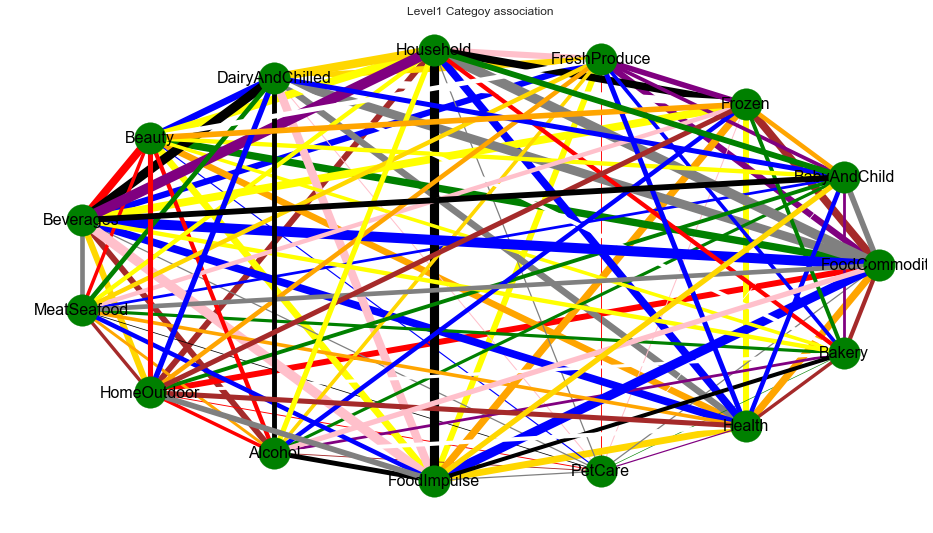

In [217]:
#######################################################################################################################################################
 
 
def plot_weighted_graph():
    "Plot a weighted graph"
 

    G = nx.Graph() 
    node_list = list(nodedic)
    for node in node_list:
        G.add_node(node)
 

    pos=nx.circular_layout(G) 
    nx.draw_networkx_nodes(G,pos,node_color='green',node_size=1000) 
    
 

    labels = {}
    for node_name in node_list:
        labels[str(node_name)] =str(node_name)
    nx.draw_networkx_labels(G,pos,labels,font_size=16)
    

 
    for node in node_list:
        for pair in node_list:
            if (pair == node):
                continue
            G.add_edge(node, pair, weight= nodedic[node][pair])
    
    
    all_weights = []

    for (node1,node2,data) in G.edges(data=True):
        all_weights.append(data['weight']) 
 

    unique_weights = list(set(all_weights))
 
    colourList = ['brown', 'red', 'yellow', 'pink', 'gold', 'blue', 'purple', 'Orange', 'grey', 'green', 'black', 'white', 'blue', 'red']
    i = 0
    for weight in unique_weights:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        width = weight*len(node_list)*35.0/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width, edge_color= colourList[i])
        i += 1
        if(i == (len(colourList)-1)):
            i = 0
    
    plt.axis('off')
    plt.title('Level1 Categoy association')
    plt.rcParams["figure.figsize"] = [16,9]

    plt.show() 
 
plot_weighted_graph()

## "Baverages" and "Food Commodity" has a strong association (Thick Blue line on graph)
## "Pet Care" has week associations with other products (Thin lines on graph)

# Heat Map

## Indicates the number of category pairs

In [211]:
catList = list( probDB[["Category 1"]] ["Category 1"])
catList.index("Beverages")
mylist = list( probDB[["Category 1"]] ["Category 1"])
catList = list(dict.fromkeys(catList))

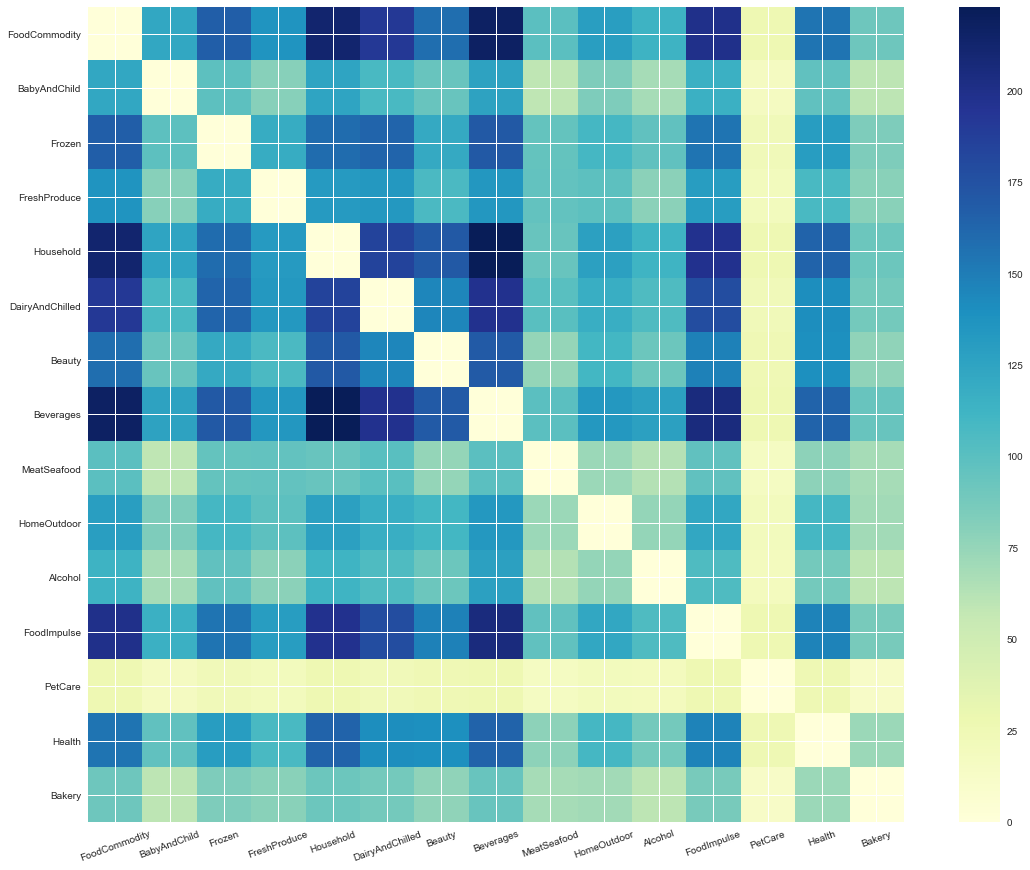

<Figure size 11520x36000 with 0 Axes>

In [212]:
import matplotlib.pyplot as plt
i = 0
j = 0 
outerList = []

while(i<len(catList)):
    newList = []
    j = 0
    while(j<len(catList)):

        if(catList[i] == catList[j]):
            j += 1
            newList.append(0)
            continue
        newList.append(nodedic[catList[i]][catList[j]])
        count += 1
        j += 1
    i += 1
    outerList.append(newList)

outerList
df = pd.DataFrame(outerList,
                  columns=catList,
                  index=catList
                  )

plt.subplots(figsize=(20,15))
plt.imshow(df, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(df)),df.columns, rotation=20)
plt.yticks(range(len(df)),df.index)
plt.figure(figsize = (160,500))
plt.show()


## 1. Pet Care care is the least bought as a pair
## 2. Baverages bought in combination with Household products

# Probabilty DataFame

## Indicates given that customer bought Category 1 product -> then probabilty of the customer to buy Category 2 product 

In [213]:
probDB = pd.DataFrame (columns = ['Category 1','Category 2', 'Probability'])

nodeList = list(nodedic)
probNode = []
probPair = []
probProb = []
for node in nodeList:
    nodeSum = sum(list(nodedic[node].values()))
    for pair in list(nodedic):
        if (node == pair):
            continue
        result = nodedic[node][pair]/nodeSum
        probNode.append(node)
        probPair.append(pair)
        probProb.append(result)

probDB["Category 1"]= probNode
probDB["Category 2"]= probPair
probDB["Probability"]= probProb



probDB = probDB.reset_index(level=0, drop=True)
probDB

,Category 1,Category 2,Probability
0,FoodCommodity,BabyAndChild,0.060426
1,FoodCommodity,Frozen,0.082714
2,FoodCommodity,FreshProduce,0.067360
3,FoodCommodity,Household,0.105002
4,FoodCommodity,DairyAndChilled,0.095097
5,FoodCommodity,Beauty,0.078257
6,FoodCommodity,Beverages,0.107479
7,FoodCommodity,MeatSeafood,0.049529
8,FoodCommodity,HomeOutdoor,0.063893
9,FoodCommodity,Alcohol,0.056464


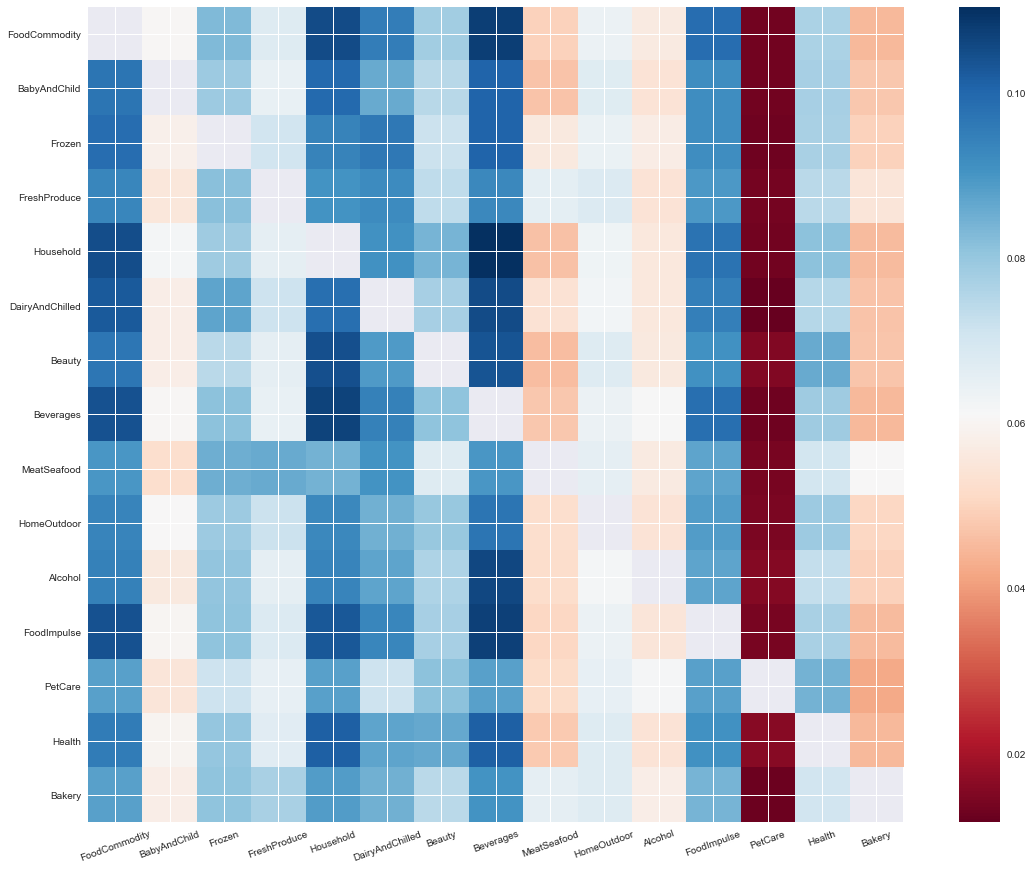

<Figure size 11520x36000 with 0 Axes>

In [214]:
import matplotlib.pyplot as plt
i = 0
j = 0 
outerList = []

while(i<len(catList)):
    newList = []
    j = 0
    while(j<len(catList)):
        if(catList[i] == catList[j]):
            j += 1
            newList.append(np.nan)
            continue
        temp = probDB[probDB["Category 1"] == catList[i]]  
        newList.append(list(temp[temp["Category 2"] == catList[j]]["Probability"])[0] )
        count += 1
        j += 1
    i += 1
    outerList.append(newList)

outerList
df = pd.DataFrame(outerList,
                  columns=catList,
                  index=catList
                  )

plt.subplots(figsize=(20,15))
plt.imshow(df, cmap="RdBu")
plt.colorbar()
plt.xticks(range(len(df)),df.columns, rotation=20)
plt.yticks(range(len(df)),df.index)
plt.figure(figsize = (160,500))

plt.show()


## Pet care products usually bought individually 

# 2. Identify 1-1 product category association rules for each cluster if_bought-category -> likely_to_buy_this_category and evaluate them based on relevant metrics. Code libraries used should be limited to linear algebra and DataFrame manipulation.

# Probabilty DataFame

## Indicates given that customer bought Category 1 product -> then probabilty of the customer to buy Category 2 product 

In [215]:
probDB = pd.DataFrame (columns = ['Category 1','Category 2', 'Probability'])

nodeList = list(nodedic)
probNode = []
probPair = []
probProb = []
for node in nodeList:
    nodeSum = sum(list(nodedic[node].values()))
    for pair in list(nodedic):
        if (node == pair):
            continue
        result = nodedic[node][pair]/nodeSum
        probNode.append(node)
        probPair.append(pair)
        probProb.append(result)

probDB["Category 1"]= probNode
probDB["Category 2"]= probPair
probDB["Probability"]= probProb



probDB = probDB.reset_index(level=0, drop=True)
probDB

,Category 1,Category 2,Probability
0,FoodCommodity,BabyAndChild,0.060426
1,FoodCommodity,Frozen,0.082714
2,FoodCommodity,FreshProduce,0.067360
3,FoodCommodity,Household,0.105002
4,FoodCommodity,DairyAndChilled,0.095097
5,FoodCommodity,Beauty,0.078257
6,FoodCommodity,Beverages,0.107479
7,FoodCommodity,MeatSeafood,0.049529
8,FoodCommodity,HomeOutdoor,0.063893
9,FoodCommodity,Alcohol,0.056464
